## import packages

In [1]:
# for statistical
import pandas as pd
import statsmodels.formula as sm
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [2]:
path ='/home/fajrin/ML_29/Linear_reg/bangalore home price/bengaluru_house_prices.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
df.info()
print('=='*40)
display(df.isnull().any())
print('=='*40)
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
area_type       13320 non-null object
availability    13320 non-null object
location        13319 non-null object
size            13304 non-null object
society         7818 non-null object
total_sqft      13320 non-null object
bath            13247 non-null float64
balcony         12711 non-null float64
price           13320 non-null float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


area_type       False
availability    False
location         True
size             True
society          True
total_sqft      False
bath             True
balcony          True
price           False
dtype: bool

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [5]:
df.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [6]:
df.corr()

,bath,balcony,price
bath,1.000000,0.204201,0.456345
balcony,0.204201,1.000000,0.120355
price,0.456345,0.120355,1.000000


## Data Cleaning

In [7]:
df.columns[df.isnull().any()]
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

### Size

In [8]:
df[df.location.isnull()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
568,Super built-up Area,Ready To Move,NaN,3 BHK,Grare S,1600,3.0,2.0,86.0


In [9]:
df[df.society=='Grare S']

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
568,Super built-up Area,Ready To Move,NaN,3 BHK,Grare S,1600,3.0,2.0,86.0
12238,Carpet Area,Ready To Move,Anantapura,3 BHK,Grare S,1600,3.0,2.0,77.0


In [10]:
df.location.fillna('Anantapura' , inplace = True)

In [11]:
df.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [12]:
df.location[df.price.max()]

'Kundalahalli'

In [13]:
df.price.max()
list_drop =['avilability']

### Bath

In [14]:
df
df[['size' , 'bath' ,'balcony']]

,size,bath,balcony
0,2 BHK,2.0,1.0
1,4 Bedroom,5.0,3.0
2,3 BHK,2.0,3.0
3,3 BHK,3.0,1.0
4,2 BHK,2.0,1.0
...,...,...,...
13315,5 Bedroom,4.0,0.0
13316,4 BHK,5.0,NaN
13317,2 BHK,2.0,1.0
13318,4 BHK,4.0,1.0


### Balcony

## Feature Engineering

### BHK

In [15]:
df[df['size'].isnull()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
579,Plot Area,Immediate Possession,Sarjapur Road,NaN,Asiss B,1200 - 2400,NaN,NaN,34.185
1775,Plot Area,Immediate Possession,IVC Road,NaN,Orana N,2000 - 5634,NaN,NaN,124.000
2264,Plot Area,Immediate Possession,Banashankari,NaN,NaN,2400,NaN,NaN,460.000
2809,Plot Area,Immediate Possession,Sarjapur Road,NaN,AsdiaAr,1200 - 2400,NaN,NaN,28.785
2862,Plot Area,Immediate Possession,Devanahalli,NaN,Ajleyor,1500 - 2400,NaN,NaN,46.800
5333,Plot Area,Immediate Possession,Devanahalli,NaN,Emngs S,2100 - 5405,NaN,NaN,177.115
6423,Plot Area,Immediate Possession,Whitefield,NaN,SRniaGa,2324,NaN,NaN,26.730
6636,Plot Area,Immediate Possession,Jigani,NaN,S2enste,1500,NaN,NaN,25.490
6719,Plot Area,Immediate Possession,Hoskote,NaN,SJowsn,800 - 2660,NaN,NaN,28.545
7680,Plot Area,Immediate Possession,Kasavanhalli,NaN,NaN,5000,NaN,NaN,400.000


In [16]:
df['size'].fillna(method='ffill' , inplace = True)

In [17]:
df['bhk_size'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

### Make range of area type

In [18]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [19]:
df['area_type'].isnull().any()

False

In [20]:
df.area_type

0        Super built-up  Area
1                  Plot  Area
2              Built-up  Area
3        Super built-up  Area
4        Super built-up  Area
                 ...         
13315          Built-up  Area
13316    Super built-up  Area
13317          Built-up  Area
13318    Super built-up  Area
13319    Super built-up  Area
Name: area_type, Length: 13320, dtype: object

In [21]:
d = {'Super built-up  Area':1 , 'Built-up  Area':2,
    'Plot  Area':3 , 'Carpet  Area':4}

In [22]:
df['area_type_range'] = df['area_type'].apply(lambda x :next((v for k , v in d.items() if x in k)))

In [23]:
df.loc[(pd.isnull(df.bath)) , 'bath'] = df['bhk_size']

### Make ready feature

In [24]:
df['ready']=df['availability'].apply(lambda x:(int(1) if x =='Ready To Move' else 0))

In [25]:
df.head(3)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk_size,area_type_range,ready
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2,1,0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4,3,1
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,3,2,1


- filling missing value balcony

In [26]:
df['balcony'].value_counts()


2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

In [27]:
#df[df.ready==1].balcony.value_counts()
#df.loc[pd.isnull(df['balcony'] & df.ready==1),'balcony'] = df['balcony'].fillna(value=2)
#df[df.balcony.isnull()][df.ready==1]


In [28]:
df.balcony.isnull().sum()

609

In [29]:
(df[df.balcony.isnull()].ready==1).sum()

503

In [30]:
df.loc[df.balcony.isnull() & df.ready==1 ,'balcony'] = df['balcony'].fillna(value=2)

In [31]:
(df[df.balcony.isnull()].ready==0).sum()

106

In [32]:
(df[df.balcony.isnull()].ready==1).sum()

0

In [33]:
df.loc[df['balcony'].isnull() & df['ready']==0 , 'balcony'] = df['balcony'].fillna(value=1)

### Make price per sqft

In [34]:
total_sqft=pd.to_numeric(df.total_sqft , errors ='coerce')

In [35]:
df['price_per_sqft'] = df['price'] * 100000 / total_sqft

### Reduction location

In [36]:
df.location
location_stats = df['location'].value_counts(ascending = False)
location_10=location_stats[location_stats<=10]

In [37]:
df.location = df.location.apply (lambda x :'other'if x in location_10 else x )

In [38]:
df[df.location=='other'].head(2)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk_size,area_type_range,ready,price_per_sqft
9,Plot Area,Ready To Move,other,6 Bedroom,NaN,1020,6.0,2.0,370.0,6,3,1,36274.509804
18,Super built-up Area,Ready To Move,other,3 BHK,PeBayle,2770,4.0,2.0,290.0,3,1,1,10469.314079


In [ ]:
data =new_df.groupby('location' , as_index =True)


## Removing outliers


- removal outliers based on the bussiness logic

In [43]:
new_df = df[~(total_sqft/df.bhk_size<300)]

In [44]:
new_df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk_size,area_type_range,ready,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2,1,0,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4,3,1,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,3,2,1,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3,1,1,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,2,1,1,4250.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00,5,2,1,6689.834926
13316,Super built-up Area,Ready To Move,other,4 BHK,NaN,3600,5.0,2.0,400.00,4,1,1,11111.111111
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00,2,2,1,5258.545136
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00,4,1,0,10407.336319


- removal outliers using standard deviation and mean of the data

In [46]:
new_df.shape

(12576, 13)

In [73]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key , subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out , reduced_df], ignore_index = True)
    return df_out

In [74]:
new_df1 = remove_pps_outliers(new_df)

In [76]:
new_df1.describe()

,bath,balcony,price,bhk_size,area_type_range,ready,price_per_sqft
count,10157.000000,10157.000000,10157.000000,10157.000000,10157.000000,10157.000000,10157.000000
mean,2.471990,1.620163,91.104428,2.573496,1.359358,0.795018,5669.647416
std,0.973015,0.773769,86.233886,0.893854,0.643410,0.403708,2274.501715
min,1.000000,0.000000,10.000000,1.000000,1.000000,0.000000,1250.000000
25%,2.000000,1.000000,49.000000,2.000000,1.000000,1.000000,4242.424242
50%,2.000000,2.000000,67.000000,2.000000,1.000000,1.000000,5183.823529
75%,3.000000,2.000000,100.000000,3.000000,2.000000,1.000000,6451.612903
max,16.000000,3.000000,2200.000000,16.000000,4.000000,1.000000,24509.803922


In [39]:
def plot(df , location):
    bhk2 = df[(df.location==location) & (df.bhk_size ==2)]
    bhk3 = df[(df.location==location) & (df.bhk_size ==3)]
    plt.figure(figsize=(15,10))
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    

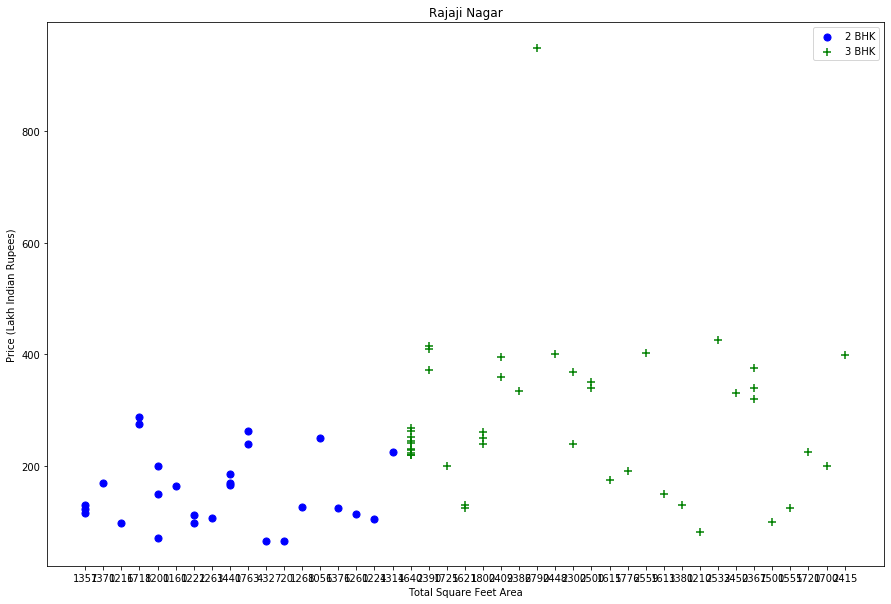

In [40]:
plot(df,"Rajaji Nagar")

In [91]:
def remove_bhk_outliers (df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats={}
        for bhk , bhk_df in location_df.groupby('bhk_size'):
            bhk_stats[bhk]={
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]}
        for bhk , bhk_df in location_df.groupby('bhk_size'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices , axis =0)
            
    

In [92]:
new_df2 = remove_bhk_outliers(new_df1)

In [94]:
new_df2.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk_size,area_type_range,ready,price_per_sqft
1,Super built-up Area,Ready To Move,Devarachikkanahalli,2 BHK,Clntsrt,1250,2.0,2.0,40.0,2,1,1,3200.000000
2,Plot Area,Ready To Move,Devarachikkanahalli,2 Bedroom,NaN,1200,2.0,2.0,83.0,2,3,1,6916.666667
3,Super built-up Area,Ready To Move,Devarachikkanahalli,2 BHK,NaN,1170,2.0,2.0,40.0,2,1,1,3418.803419
4,Super built-up Area,Ready To Move,Devarachikkanahalli,3 BHK,Shireru,1425,2.0,2.0,65.0,3,1,1,4561.403509
5,Super built-up Area,Ready To Move,Devarachikkanahalli,2 BHK,NaN,947,2.0,2.0,43.0,2,1,1,4540.654699


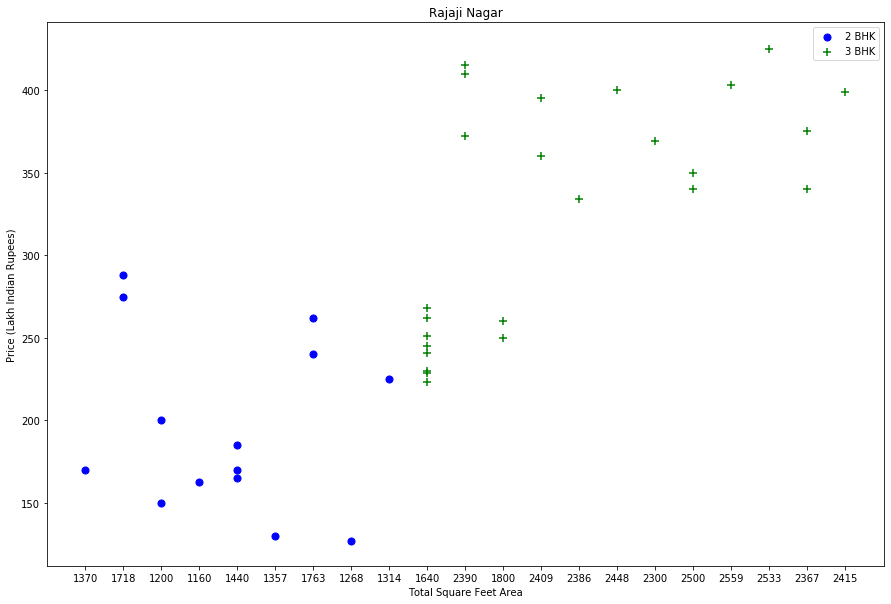

In [95]:
plot(new_df2,"Rajaji Nagar")

In [98]:
data =[1,2,3]
ex={}
for i in data :
    ex[i]={'mean': 90 , 'count': 98}
    

In [99]:
ex

{1: {'mean': 90, 'count': 98},
 2: {'mean': 90, 'count': 98},
 3: {'mean': 90, 'count': 98}}

In [100]:
ex.get(1)

{'mean': 90, 'count': 98}